# Simulate the Monty Hall Problem
- Simulate three doors, one car, and two goats.
- Simulate three players: the switcher, the conservative, and the newcomer.
- Record who wins.
- Repeat it many times.
- Which player do you want to be?

Food for thought: And what if you had N doors to choose from and the presenter opens p<=N of them? Study how the probability of winning changes as a function of p and n 
.

In [8]:
import numpy as np
import random
import matplotlib.pyplot as plt

K = 10  # Max number of doors + m

M = 1  # Number of doors opened by the host 

x_range = range(M+2, K + M +2)  # Range comune per tutti i grafici

prob_change = []
prob_no_change = []
prob_mean_newcome = []
formula_values = []  # Lista per i valori teorici

n = 10000  # Number of iterations


In [9]:
from tqdm import tqdm

for N in tqdm(x_range, desc="Ciclo {N} (porte)"):  # N = number of doors in each cycle

    win_switch = 0  # Wins when switching doors
    win_no_switch = 0  # Wins without switching doors
    loss_switch = 0  # Losses when switching doors
    loss_no_switch = 0  # Losses without switching doors

    prob_newcome = []  # Probabilities for the newcomer

    for i in tqdm(range(n), desc=f"Simulazioni per N={N}", leave=False):
        doors = np.zeros(N)  # Initial array of goats
        position = random.randint(0, N - 1)  # Position of the prize
        scelta = random.randint(0, N - 1)  # The door initially chosen by the player
        doors[position] = 1  # Put the prize back behind one of the doors

        s = 0  # Number of cells deleted before the chosen door
        p = 0  # Number of cells deleted before the position

        prob_newcome.append(1 / (N - M))  # Probability for the newcomer

        pos_to_del = set()  # Set of open doors

        while len(pos_to_del) < M:
            PosM = random.randint(0, N - 1)
            if doors[PosM] != 1 and PosM != scelta:
                pos_to_del.add(PosM)

        pos_to_del = sorted(pos_to_del)  # Sorting the array

        # Calculate corrections for s and p
        s = sum(1 for pos in pos_to_del if pos < scelta)
        p = sum(1 for pos in pos_to_del if pos < position)

        doors = np.delete(doors, list(pos_to_del))  # Opening of the doors

        position = position - p  # Correction for position and scelta
        scelta = scelta - s

        change = random.randint(0, 1)  # 0 = doesn't switch, 1 = switches

        # Player doesn't switch
        if scelta == position and change == 0:
            win_no_switch += 1
        elif scelta != position and change == 0:
            loss_no_switch += 1

        # Player switches
        if scelta == position and change == 1:
            loss_switch += 1
        elif scelta != position and change == 1:
            while True:
                a = random.randint(0, len(doors) - 1)  # Doors where the player can change
                if a != scelta:  # Can't choose the previous door
                    break
            if position == a:
                win_switch += 1
            else:
                loss_switch += 1

    prob_no_switch = win_no_switch / (win_no_switch + loss_no_switch)
    prob_switch = win_switch / (win_switch + loss_switch)

    print(f"Probability of winning without switch --> {N} doors: {prob_no_switch:.4f}")
    print(f"Probability of winning with switch --> {N} doors: {prob_switch:.4f}")
    print(f"Probability of winning for the newcomer --> {N} doors: {np.mean(prob_newcome):.4f} \n")

    prob_no_change.append(prob_no_switch)
    prob_change.append(prob_switch)
    prob_mean_newcome.append(np.mean(prob_newcome))

    # Formula for the theoretical probability based on N and M
    formula_values.append((1 / N) * (N - 1) / (N - 1 - M))  # Theoretical formula



Ciclo {N} (porte):   0%|          | 0/10 [00:00<?, ?it/s]

Ciclo {N} (porte):  10%|█         | 1/10 [00:00<00:02,  3.82it/s]

Probability of winning without switch --> 3 doors: 0.3388
Probability of winning with switch --> 3 doors: 0.6596
Probability of winning for the newcomer --> 3 doors: 0.5000 



Ciclo {N} (porte):  20%|██        | 2/10 [00:00<00:01,  4.17it/s]

Probability of winning without switch --> 4 doors: 0.2461
Probability of winning with switch --> 4 doors: 0.3798
Probability of winning for the newcomer --> 4 doors: 0.3333 



Ciclo {N} (porte):  30%|███       | 3/10 [00:00<00:01,  4.00it/s]

Probability of winning without switch --> 5 doors: 0.1948
Probability of winning with switch --> 5 doors: 0.2643
Probability of winning for the newcomer --> 5 doors: 0.2500 



Ciclo {N} (porte):  40%|████      | 4/10 [00:00<00:01,  4.46it/s]

Probability of winning without switch --> 6 doors: 0.1669
Probability of winning with switch --> 6 doors: 0.2077
Probability of winning for the newcomer --> 6 doors: 0.2000 



Ciclo {N} (porte):  50%|█████     | 5/10 [00:01<00:01,  4.64it/s]

Probability of winning without switch --> 7 doors: 0.1425
Probability of winning with switch --> 7 doors: 0.1673
Probability of winning for the newcomer --> 7 doors: 0.1667 



Ciclo {N} (porte):  60%|██████    | 6/10 [00:01<00:00,  4.52it/s]

Probability of winning without switch --> 8 doors: 0.1257
Probability of winning with switch --> 8 doors: 0.1380
Probability of winning for the newcomer --> 8 doors: 0.1429 



Ciclo {N} (porte):  70%|███████   | 7/10 [00:01<00:00,  4.74it/s]

Probability of winning without switch --> 9 doors: 0.1093
Probability of winning with switch --> 9 doors: 0.1241
Probability of winning for the newcomer --> 9 doors: 0.1250 



Probability of winning without switch --> 10 doors: 0.1045
Probability of winning with switch --> 10 doors: 0.1100
Probability of winning for the newcomer --> 10 doors: 0.1111 



Ciclo {N} (porte):  90%|█████████ | 9/10 [00:01<00:00,  5.06it/s]

Probability of winning without switch --> 11 doors: 0.0986
Probability of winning with switch --> 11 doors: 0.1002
Probability of winning for the newcomer --> 11 doors: 0.1000 



Ciclo {N} (porte): 100%|██████████| 10/10 [00:02<00:00,  4.70it/s]

Probability of winning without switch --> 12 doors: 0.0828
Probability of winning with switch --> 12 doors: 0.0856
Probability of winning for the newcomer --> 12 doors: 0.0909 



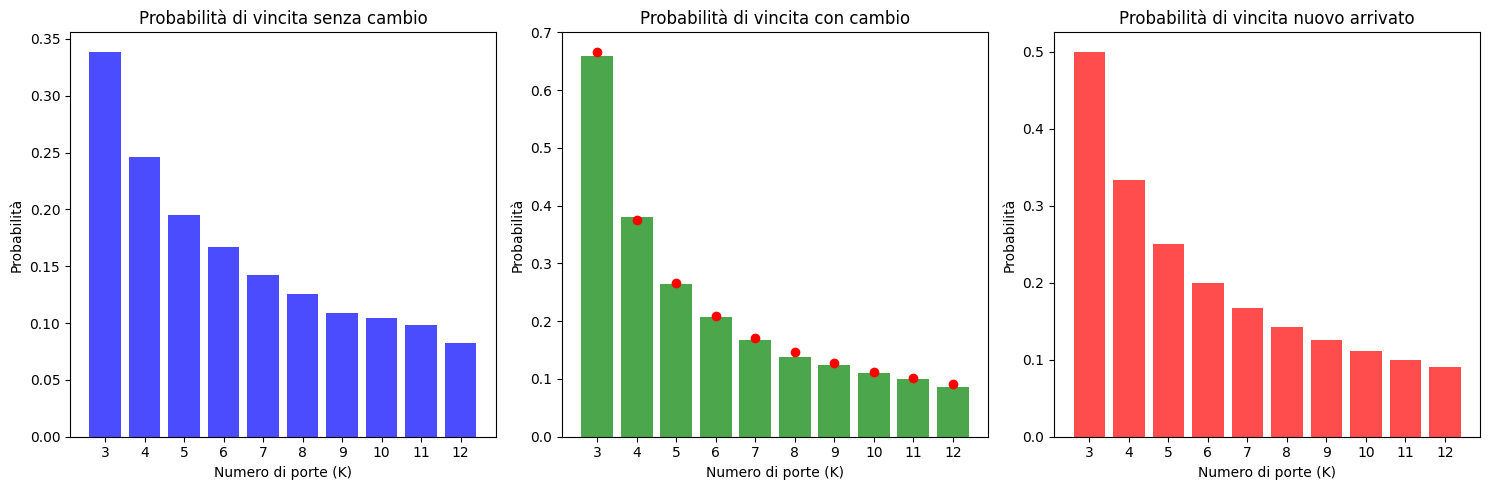

In [10]:
# Generating histograms
plt.figure(figsize=(15, 5))

# First histogram: Probability without change
plt.subplot(1, 3, 1)
plt.bar(x_range, prob_no_change, color='blue', alpha=0.7)
plt.title('Probabilità di vincita senza cambio')
plt.xlabel('Numero di porte (K)')
plt.ylabel('Probabilità')
plt.xticks(x_range)

# Second histogram: Probability with change
plt.subplot(1, 3, 2)
plt.bar(x_range, prob_change, color='green', alpha=0.7)
plt.title('Probabilità di vincita con cambio')
plt.xlabel('Numero di porte (K)')
plt.ylabel('Probabilità')
plt.xticks(x_range)

# Add theoretical points to the second histogram
plt.plot(x_range, formula_values, 'o', color='red', label='Valori da formula')

# Third histogram: Probability for the newcomer
plt.subplot(1, 3, 3)
plt.bar(x_range, prob_mean_newcome, color='red', alpha=0.7)
plt.title('Probabilità di vincita nuovo arrivato')
plt.xlabel('Numero di porte (K)')
plt.ylabel('Probabilità')
plt.xticks(x_range)

# Show the histograms
plt.tight_layout()
plt.show()
